<a href="https://colab.research.google.com/github/Sachiteltumbade/skills-introduction-to-github/blob/main/Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Salary Prediction of Data Professions.csv')
data.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [ ]:
data.shape

(2639, 13)

In [ ]:
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


In [ ]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [ ]:
data.shape

(2631, 13)

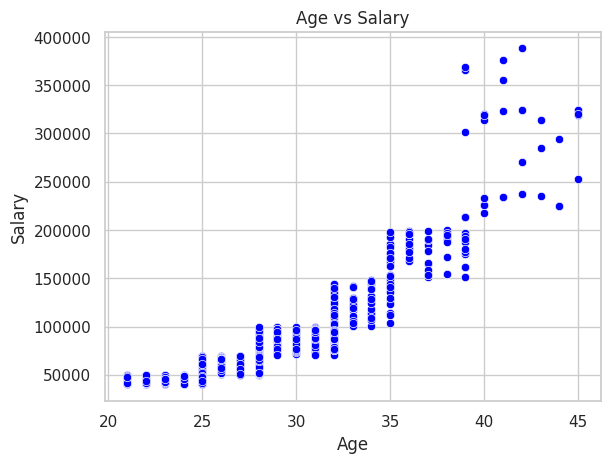

In [ ]:
sns.set(style="whitegrid")
#size of plot
#plt.figure(figsize=(15, 15))

#Age vs Salary
#plt.subplot(3, 1, 1)
sns.scatterplot(x='AGE', y='SALARY', data=data, color='blue')
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')

plt.show()


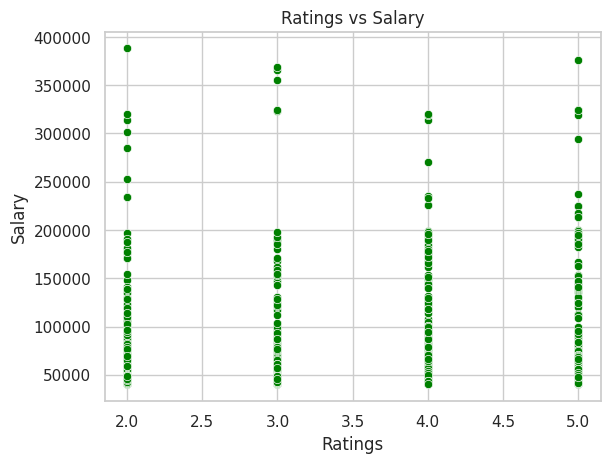

In [ ]:
# Scatter plot of Ratings vs Salary
#plt.subplot(3, 1, 2)

#plt.figure(figsize=(15, 15))
sns.scatterplot(x='RATINGS', y='SALARY', data=data, color='green')
plt.title('Ratings vs Salary')
plt.xlabel('Ratings')
plt.ylabel('Salary')
plt.show()


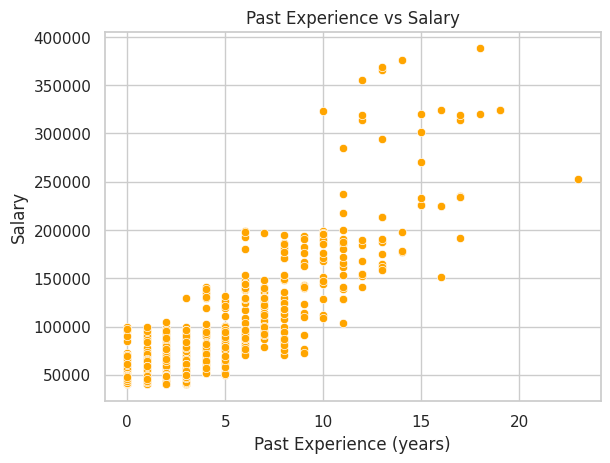

In [ ]:
# Scatter plot of Past Experience vs Salary
#plt.subplot(3, 1, 3)
#plt.figure(figsize=(10, 10))
sns.scatterplot(x='PAST EXP', y='SALARY', data=data, color='orange')
plt.title('Past Experience vs Salary')
plt.xlabel('Past Experience (years)')
plt.ylabel('Salary')
plt.show()

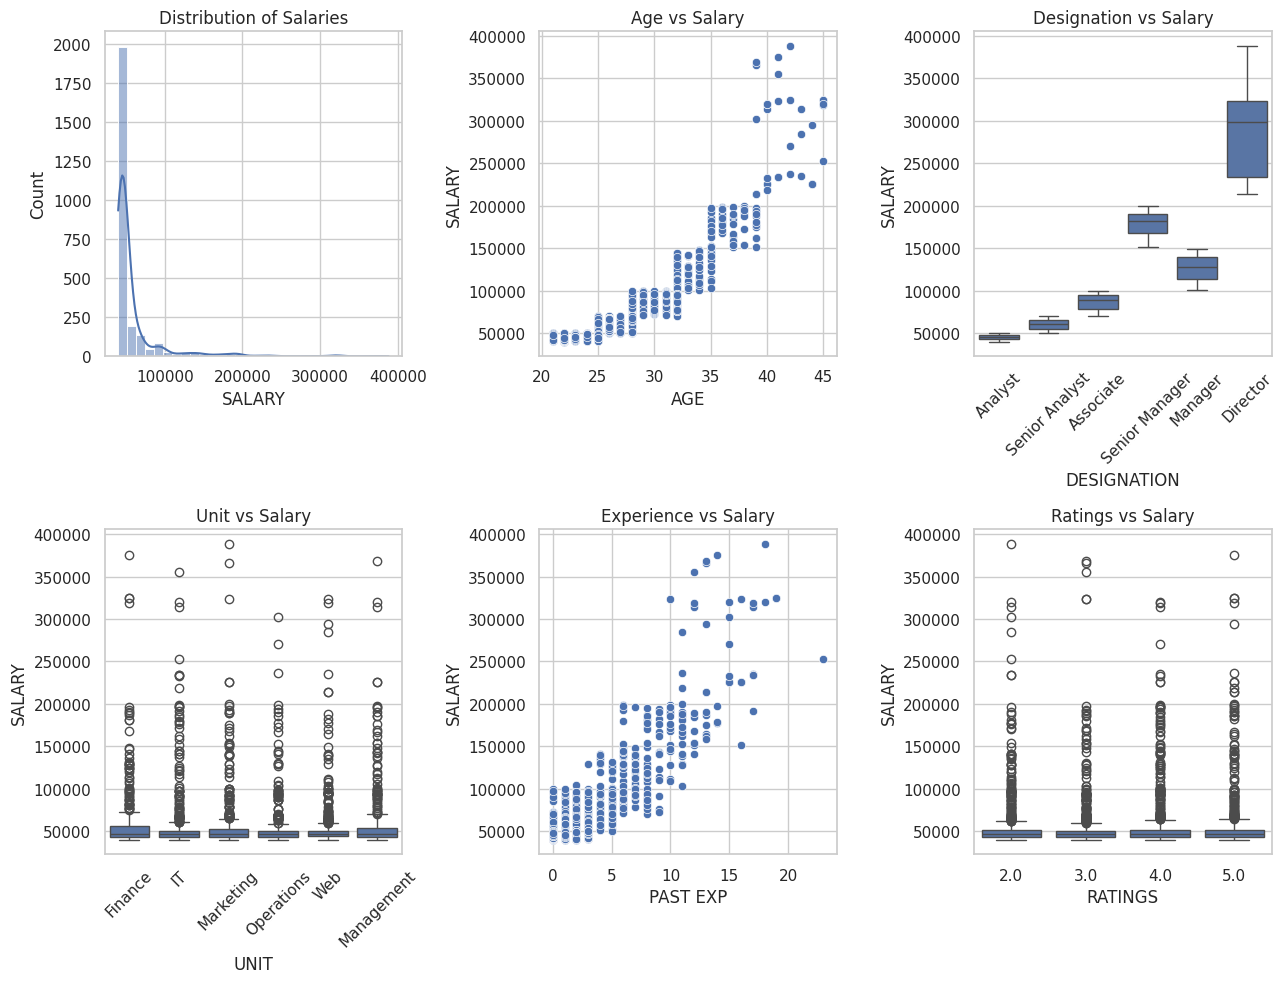

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 10))

#Distribution of Salaries
plt.subplot(2, 3, 1)
sns.histplot(data['SALARY'], kde=True, bins=30)
plt.title('Distribution of Salaries')

#Age vs Salary
plt.subplot(2, 3, 2)
sns.scatterplot(x=data['AGE'], y=data['SALARY'])
plt.title('Age vs Salary')

#Designation vs Salary
plt.subplot(2, 3, 3)
sns.boxplot(x='DESIGNATION', y='SALARY', data=data)
plt.title('Designation vs Salary')
plt.xticks(rotation=45)

#Unit vs Salary
plt.subplot(2, 3, 4)
sns.boxplot(x='UNIT', y='SALARY', data=data)
plt.title('Unit vs Salary')
plt.xticks(rotation=45)

#Experience vs Salary
plt.subplot(2, 3, 5)
sns.scatterplot(x=data['PAST EXP'], y=data['SALARY'])
plt.title('Experience vs Salary')

#Ratings vs Salary
plt.subplot(2, 3, 6)
sns.boxplot(x='RATINGS', y='SALARY', data=data)
plt.title('Ratings vs Salary')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/content/drive/MyDrive/Salary Prediction of Data Professions.csv')
data

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [ ]:
# conversion of the date columns to datetime format
data['DOJ'] = pd.to_datetime(data['DOJ'], errors='coerce')
data['CURRENT DATE'] = pd.to_datetime(data['CURRENT DATE'], errors='coerce')

In [ ]:
# handling missing values
data['LAST NAME'].fillna('Unknown', inplace=True)
data['AGE'].fillna(data['AGE'].median(), inplace=True)
data['LEAVES USED'].fillna(data['LEAVES USED'].median(), inplace=True)
data['LEAVES REMAINING'].fillna(data['LEAVES REMAINING'].median(), inplace=True)
data['RATINGS'].fillna(data['RATINGS'].median(), inplace=True)
data.dropna(subset=['DOJ'], inplace=True)

In [ ]:
data['TENURE'] = (data['CURRENT DATE'] - data['DOJ']).dt.days / 365
data['AVG_LEAVES_PER_YEAR'] = data['LEAVES USED'] / data['TENURE']

In [ ]:
X = data.drop(columns=['FIRST NAME', 'LAST NAME', 'SALARY', 'DOJ', 'CURRENT DATE'])
y = data['SALARY']

In [ ]:
categorical_features = ['SEX', 'DESIGNATION', 'UNIT']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features = [feature for feature in numeric_features if feature not in ['TENURE', 'AVG_LEAVES_PER_YEAR']]

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features + ['TENURE', 'AVG_LEAVES_PER_YEAR']),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


In [ ]:
# Spliting the data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Defining a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [ ]:
# Preprocess the training data
X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed = pipeline.transform(X_test)

# Save the preprocessed data for modeling
np.save('X_train_preprocessed.npy', X_train_preprocessed)
np.save('X_test_preprocessed.npy', X_test_preprocessed)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the preprocessed data
X_train_preprocessed = np.load('X_train_preprocessed.npy')
X_test_preprocessed = np.load('X_test_preprocessed.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Train the models and evaluate their performance
results = {}

for model_name, model in models.items():
    model.fit(X_train_preprocessed, y_train)
    y_pred = model.predict(X_test_preprocessed)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
results_df


,MAE,MSE,RMSE,R2
Linear Regression,4293.808568,6.342126e+07,7963.746363,0.956728
Decision Tree,4954.363636,1.155399e+08,10748.949810,0.921168
Random Forest,4310.221982,7.722870e+07,8787.986138,0.947307
Gradient Boosting,4566.942032,7.922730e+07,8900.971996,0.945944


In [ ]:
import joblib
#Gradient Boosting
best_model = GradientBoostingRegressor(random_state=42)
best_model.fit(X_train_preprocessed, y_train)
# Save the best model
joblib.dump(best_model, 'best_model.pkl')
# Loading  the model
loaded_model = joblib.load('best_model.pkl')
# Check the performance
y_pred_loaded = loaded_model.predict(X_test_preprocessed)
mae_loaded = mean_absolute_error(y_test, y_pred_loaded)
mse_loaded = mean_squared_error(y_test, y_pred_loaded)
rmse_loaded = np.sqrt(mse_loaded)
r2_loaded = r2_score(y_test, y_pred_loaded)

print(f'MAE: {mae_loaded}, MSE: {mse_loaded}, RMSE: {rmse_loaded}, R2: {r2_loaded}')


MAE: 4566.942032343239, MSE: 79227302.4690928, RMSE: 8900.97199574815, R2: 0.945943502296045


In [ ]:
# Predict salaries
y_pred = loaded_model.predict(X_test_preprocessed)
#comparing given and predicted salaries
comparison_df = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred})
print(comparison_df.head())
#comparison
comparison_df.to_csv('salary_predictions_comparison.csv', index=False)

   Actual Salary  Predicted Salary
0          42672      45088.453625
1          49660      45088.453625
2          96276      89553.724078
3          44054      45050.392809
4          46822      45187.436334
